In [21]:
import os
import shutil
import unittest
import importlib

import numpy as np
import torch
import matplotlib.pyplot as plt

from src.ai.base_net import ArchitectureConfig
from src.ai.evaluator import Evaluator, EvaluatorConfig
from src.core.utils import get_to_root_dir, get_filename_without_extension
from src.ai.architectures import *  # Do not remove
from src.data.data_loader import DataLoaderConfig, DataLoader

os.environ['DATADIR'] = os.environ['HOME']+'/code/imitation-learning-codebase/experimental_data'
output_path = "offline_model_evaluation"
architecture_base_config = {
    "output_path": output_path,
    "architecture": "dronet",
    "initialisation_type": 'xavier',
}
network = eval(architecture_base_config['architecture']).Net(
            config=ArchitectureConfig().create(config_dict=architecture_base_config)
        )

dronet - INFO - Started.


In [22]:
evaluator_base_config = {
    "output_path": output_path,
    "data_loader_config": {
        "input_size": [1, 200, 200],
        "hdf5_files": ['line_world_data/real/validation.hdf5']
    },
}
evaluator = Evaluator(config=EvaluatorConfig().create(config_dict=evaluator_base_config),
                      network=network)

data_loader - INFO - Started.
data_loader - INFO - Loaded 1186 from ['/Users/kelchtermans/code/imitation-learning-codebase/experimental_data/line_world_data/real/validation.hdf5']


In [45]:
dataset = evaluator.data_loader.get_dataset()
predictions = network.forward(dataset.observations, train=False)
error =  predictions - torch.stack(dataset.actions)

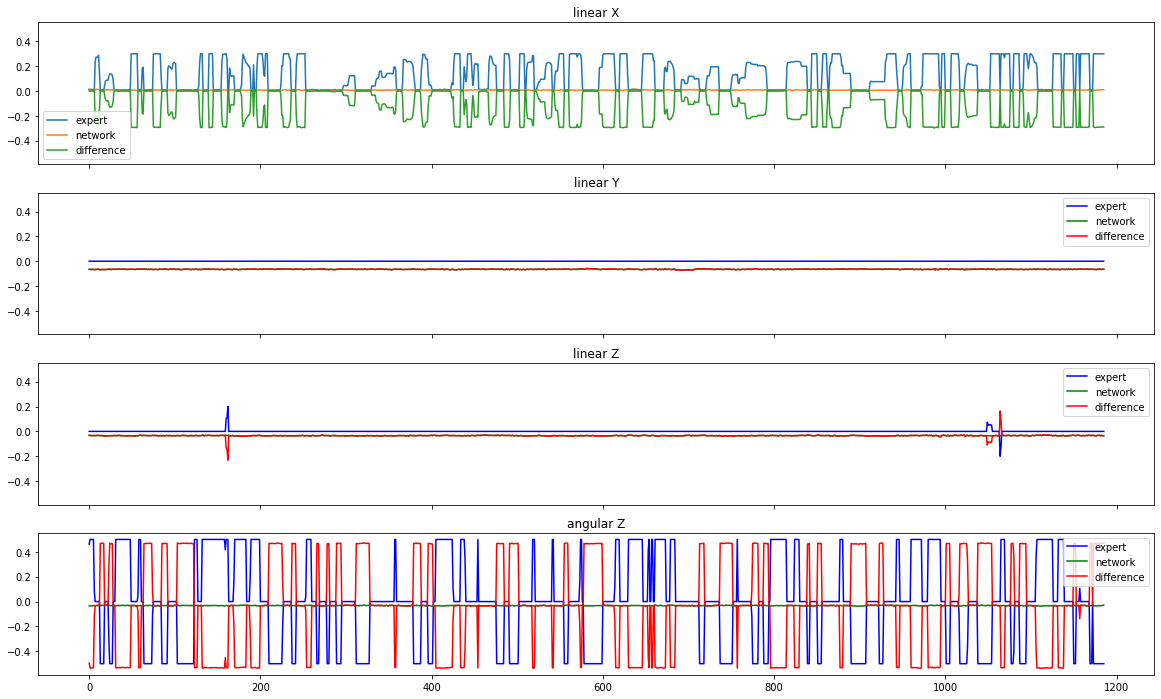

In [51]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(20, 3*4))

ax1.set_title('linear X')
ax1.plot([a[0] for a in dataset.actions], 'C0', label='expert')
ax1.plot([p[0] for p in predictions], 'C1', label='network')
ax1.plot([e[0] for e in error], 'C2', label='difference')
ax1.legend()

ax2.set_title('linear Y')
ax2.plot([a[1] for a in dataset.actions], 'b', label='expert')
ax2.plot([p[1] for p in predictions], 'g', label='network')
ax2.plot([e[1] for e in error], 'r', label='difference')
ax2.legend()

ax3.set_title('linear Z')
ax3.plot([a[2] for a in dataset.actions], 'b', label='expert')
ax3.plot([p[2] for p in predictions], 'g', label='network')
ax3.plot([e[2] for e in error], 'r', label='difference')
ax3.legend()

ax4.set_title('angular Z')
ax4.plot([a[-1] for a in dataset.actions], 'b', label='expert')
ax4.plot([p[-1] for p in predictions], 'g', label='network')
ax4.plot([e[-1] for e in error], 'r', label='difference')
ax4.legend()

plt.show()

In [50]:
import numpy as np
np.stack(dataset.actions).shape

(1186, 6)